In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import time

## 🧠 Naive Bayes Classification: Predicting Ideal Cut Quality

This function applies a **Bernoulli Naive Bayes Classifier** to predict whether a diamond has an `Ideal` cut using a combination of four physical attributes:

- `table`
- `xlength`
- `ywidth`
- `zdepth`

### Key Details:
- The selected features are transformed with **polynomial expansion (degree = 3)** to capture non-linear patterns.
- Class imbalance is handled using **RandomUnderSampler** to balance the dataset before training.
- A **pipeline** is used with:
  - `StandardScaler` for feature scaling
  - `BernoulliNB(alpha = 0.8)` as the classification model

### Outputs:
- **R² Score** of the model
- **Matthews Correlation Coefficient (MCC)** – suitable for imbalanced classes
- **Confusion Matrix**
- **Classification Report** (Precision, Recall, F1-score)
- **Execution Time**

This model is efficient for high-dimensional binary features and serves as a baseline classifier with decent interpretability and speed.

In [3]:
def naive_bayes_classifier(data, x_label, y_label):
    start_time = time.time()

    x1 = data[x_label[0]].to_numpy().reshape(-1, 1)
    x2 = data[x_label[1]].to_numpy().reshape(-1, 1)
    x3 = data[x_label[2]].to_numpy().reshape(-1, 1)
    x4 = data[x_label[3]].to_numpy().reshape(-1, 1)
    y = data[y_label].to_numpy()
    
    x = np.concatenate((x1, x2, x3, x4), axis=1)
    
    x = PolynomialFeatures(degree=3, include_bias=True).fit_transform(x)

    rus = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = rus.fit_resample(x, y)

    BNB = Pipeline ([
        ("scaler", StandardScaler()),
        ("BNB", BernoulliNB(alpha=0.8))
    ])
        
    BNB = BNB.fit(x_resampled, y_resampled)

    y_pred = BNB.predict(x_resampled)

    print("Naive Bayes Classifier")
    print("coefficient of determinantion (R^2): ", BNB["BNB"].score(x_resampled, y_resampled))
    print("matthews_corrcoef: ", matthews_corrcoef(y_resampled, y_pred))
    print()
    print("Confusion matrix: ")
    print(confusion_matrix(y_resampled, y_pred))
    print()
    print("Classification report: ")
    print(classification_report(y_resampled, y_pred))
    print()
    print("Time of execution: ", time.time() - start_time, "seconds")

## 📥 Load and Explore the Dataset

We begin by loading the **diamonds dataset** and performing initial exploration steps:

- **Rename Columns**:
  - `x → xlength`
  - `y → ywidth`
  - `z → zdepth`

These renamed features represent the physical dimensions of the diamonds.

### The following information is printed:
- First few rows of the dataset
- Dataset shape and column names
- Missing values per column
- Data types and summary statistics
- Unique value counts per feature

This ensures we understand the structure and cleanliness of the dataset before preprocessing.


In [4]:

data = pd.read_csv("data/diamonds.csv")
data.rename(columns={'x': 'xlength', 'y': 'ywidth', 'z':'zdepth'}, inplace=True)

print(data.head(), "\n")
print("Shape: ", data.shape)
print("Columns: ", data.columns, "\n")
print("Missing Values per Column:\n", data.isnull().sum(), "\n")
print(data.info())
print(data.describe())
print("Unique Values per Column:\n", data.nunique(), "\n")


   Unnamed: 0  carat      cut color clarity  depth  table  price  xlength  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326     3.95   
1           2   0.21  Premium     E     SI1   59.8   61.0    326     3.89   
2           3   0.23     Good     E     VS1   56.9   65.0    327     4.05   
3           4   0.29  Premium     I     VS2   62.4   58.0    334     4.20   
4           5   0.31     Good     J     SI2   63.3   58.0    335     4.34   

   ywidth  zdepth  
0    3.98    2.43  
1    3.84    2.31  
2    4.07    2.31  
3    4.23    2.63  
4    4.35    2.75   

Shape:  (53940, 11)
Columns:  Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'xlength', 'ywidth', 'zdepth'],
      dtype='object') 

Missing Values per Column:
 Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
xlength       0
ywidth        0
zdepth        0
dtype: int64 

<class 'pandas.core

## 🧹 Data Preprocessing: Encoding Categorical Features

To prepare the dataset for machine learning models:

- **One-hot encoding** is applied to the categorical columns:
  - `cut`, `color`, and `clarity`
- This process creates binary (0/1) columns for each category, enabling them to be used by classification algorithms.
- The first column (likely an index or unnamed column) is dropped to clean the dataset.

### Output:
- Updated shape and structure of the dataset
- Confirmation that all remaining columns are numeric
- Final check for missing values

This step ensures the data is in a fully numerical format and ready for model training.

In [5]:

data = pd.get_dummies(data, columns=["cut", "color", "clarity"])
data = data.drop(data.columns[0], axis=1)

print("Final Shape: ", data.shape)
print("Final Columns: ", data.columns, "\n")
print("Final Missing Values per Column:\n", data.isnull().sum(), "\n")


Final Shape:  (53940, 27)
Final Columns:  Index(['carat', 'depth', 'table', 'price', 'xlength', 'ywidth', 'zdepth',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object') 

Final Missing Values per Column:
 carat            0
depth            0
table            0
price            0
xlength          0
ywidth           0
zdepth           0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64 



## 📊 Correlation Matrix

This step visualizes how numerical features relate to one another using a **correlation matrix**.

- The `.corr()` method computes **Pearson correlation coefficients** between all pairs of numerical features.
- A **Seaborn heatmap** is used to display these correlations, where:
  - Values near `+1` indicate strong positive correlation
  - Values near `-1` indicate strong negative correlation
  - Values near `0` suggest little or no correlation

### Why This Is Useful:
- Helps identify relationships between features
- Detects potential multicollinearity
- Aids in feature selection and engineering

Rotate the x-axis labels for better readability of the full matrix.

Correlation Matrix:
                   carat     depth     table     price   xlength    ywidth  \
carat          1.000000  0.028224  0.181618  0.921591  0.975094  0.951722   
depth          0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341   
table          0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760   
price          0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421   
xlength        0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701   
ywidth         0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000   
zdepth         0.953387  0.094924  0.150929  0.861249  0.970772  0.952006   
cut_Fair       0.091844  0.280657  0.125332  0.018728  0.080644  0.068822   
cut_Good       0.034196  0.136114  0.175174 -0.000312  0.030349  0.032187   
cut_Ideal     -0.163660 -0.022778 -0.549599 -0.097175 -0.162674 -0.153158   
cut_Premium    0.116245 -0.198306  0.338072  0.095706  0.126820  0.107943   
cut_Very Good  0.009568  0.025828  0.119971  0.006593  

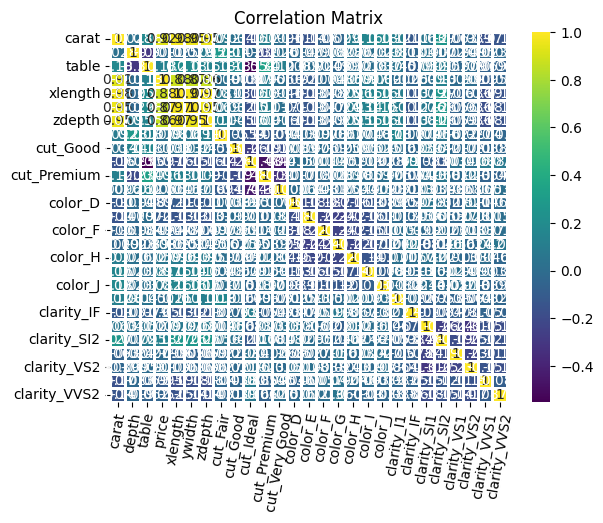

In [6]:

print("Correlation Matrix:\n", data.corr())

plt.figure(dpi=100)
plt.title("Correlation Matrix")
sns.heatmap(data.corr(), annot=True, lw=1, cmap="viridis", linecolor='white')
plt.xticks(rotation=80)
plt.show()


## 🧠 Run Naive Bayes Classification

We now apply the `naive_bayes_classifier()` function to predict whether a diamond has an `Ideal` cut using the following features:

- `table`
- `xlength`
- `ywidth`
- `zdepth`

### What's Happening:
- Features are **polynomially expanded** (degree = 3) to capture non-linear patterns.
- **Random undersampling** is used to balance the dataset and reduce class imbalance.
- A **pipeline** includes:
  - Standardization (`StandardScaler`)
  - Classification with `BernoulliNB(alpha=0.8)`

### Output Includes:
- **R² score** (accuracy on the balanced dataset)
- **Matthews Correlation Coefficient (MCC)**
- **Confusion Matrix**
- **Classification Report** (precision, recall, F1-score)
- **Execution time**

This step evaluates how well a Naive Bayes classifier can predict ideal cut quality based on physical features of the diamonds.

In [7]:

naive_bayes_classifier(data, ["table", "xlength", "ywidth", "zdepth"], "cut_Ideal")


Naive Bayes Classifier
coefficient of determinantion (R^2):  0.49993039766136144
matthews_corrcoef:  0.25940230631019967

Confusion matrix: 
[[12713  8838]
 [ 7140 14411]]

Classification report: 
              precision    recall  f1-score   support

       False       0.64      0.59      0.61     21551
        True       0.62      0.67      0.64     21551

    accuracy                           0.63     43102
   macro avg       0.63      0.63      0.63     43102
weighted avg       0.63      0.63      0.63     43102


Time of execution:  0.11228299140930176 seconds
